<div style="color:#D81F26;
           display:fill;
           border-radius:200px;
           border-style: solid;
           border-width: 6px;
           border-color:#000000;
           background-color:#f5f5f5;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Image Classification for Recycling
</h1>
</div>

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:20px;text-align: center;">I recently want to do a recycling project, which is basically image classification,<br><br> and my friends used to say that loading data is difficult, so I wanted to load the data first.</p>

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg

import glob
import os
from PIL import Image

import cv2 

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

from string import digits

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Load Data</p>

In [2]:
#../input/recycling2/Train/Cardboard
dirImage = '../input/recycling2/Train'
images_path = os.listdir(dirImage)
filenames = []
filename=[]
l = []
c=np.zeros(5, int)
for i in range(5):
    f=[]
    f+=glob.glob(dirImage+"/"+images_path[i]+"/*"+".jpg")
    l.append(images_path[i])
    c[i]+=len(f)
    filenames += f
#     filenames += glob.glob(dirImage+"/"+images_path[i]+"/*"+".jpg")
    

In [3]:
#Create_Label
label=[]
for j in range(5):
    for k in range(c[j]):
        label.append(l[j])

In [4]:
data = pd.DataFrame({'path': filenames, 'class': label})

data

,path,class
0,../input/recycling2/Train/Metal/metal375.jpg,Metal
1,../input/recycling2/Train/Metal/metal341.jpg,Metal
2,../input/recycling2/Train/Metal/metal374.jpg,Metal
3,../input/recycling2/Train/Metal/metal383.jpg,Metal
4,../input/recycling2/Train/Metal/metal215.jpg,Metal
...,...,...
2385,../input/recycling2/Train/Plastics/plastic130.jpg,Plastics
2386,../input/recycling2/Train/Plastics/plastic54.jpg,Plastics
2387,../input/recycling2/Train/Plastics/plastic308.jpg,Plastics
2388,../input/recycling2/Train/Plastics/plastic287.jpg,Plastics


In [5]:
def data_processing(data):
    Metal = []
    Glass = []
    Paper = []
#     ForPredict = []
    Cardboard = []
    Plastics = []
    
    im=[]


    for i, row in data.iterrows():
        #convert('L') --> convert image to greyscale
#         img = Image.open(row['path']).convert('L').resize((64,64))
        img = Image.open(row['path']).resize((64,64))
        img = np.array(img)
        im.append(img)
        trash = row['class']
        if trash == 'Metal':
            Metal.append(img)
        elif (trash == 'Glass'):
            Glass.append(img)
        elif (trash == 'Paper'):
            Paper.append(img)
#         elif (trash == 'ForPredict'):
#             ForPredict.append(img)
        elif (trash == 'Cardboard'):
            Cardboard.append(img)
        elif (trash == 'Plastics'):
            Plastics.append(img)

    Metal = np.array(Metal)
    Glass = np.array(Glass)
    Paper = np.array(Paper)
#     ForPredict = np.array(ForPredict)
    Cardboard = np.array(Cardboard)
    Plastics = np.array(Plastics)

    all_images = np.concatenate((Metal, Glass, Paper, Cardboard, Plastics)) #, ForPredict
    return all_images, im

In [6]:
all_images, im = data_processing(data)
# print(all_images.shape,'\n\n', all_images)

Text(0.5, 0.98, 'Trash')

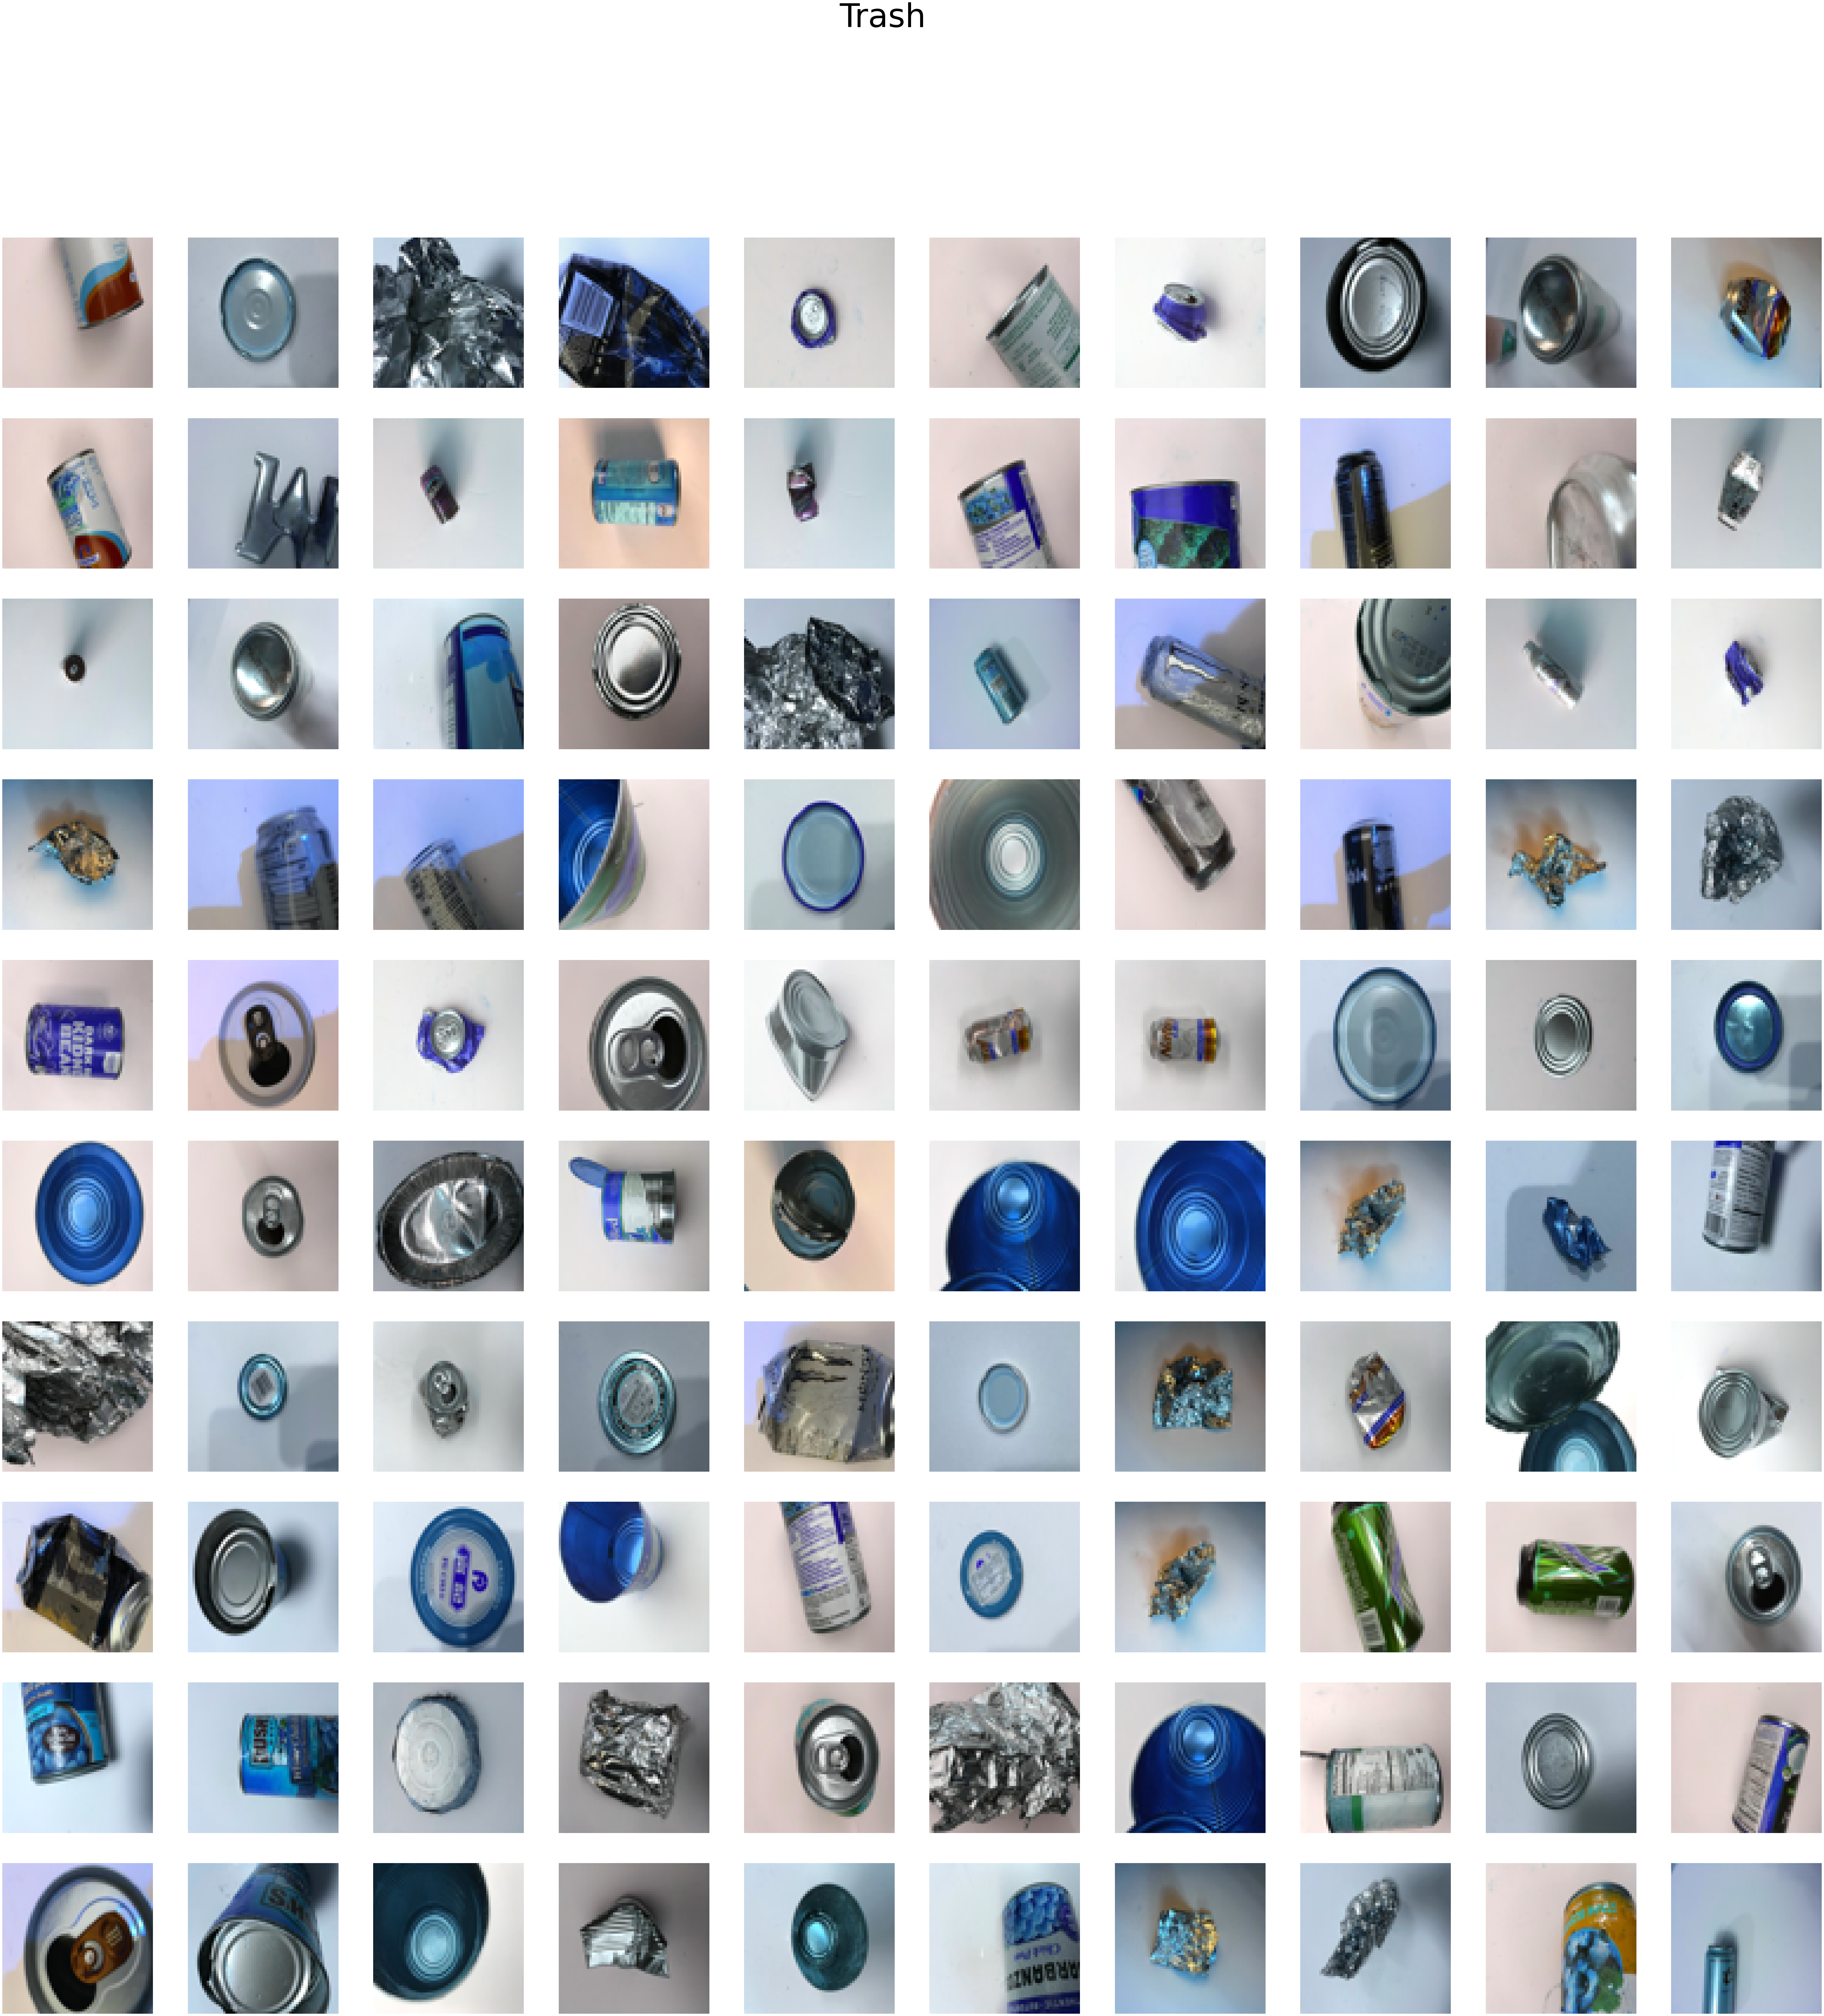

In [7]:
fig = plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
#     plt.imshow(im[i])
    plt.imshow(cv2.cvtColor(im[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.suptitle('Trash', size = 100)